# [Two Sample t-test](https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/cd386635-4bb8-4317-a87e-f944b673f5f9/15ac9607-6cd4-4cc1-aabe-26941083f623)  

[Birthweight Datset](https://www.sheffield.ac.uk/mash/statistics/datasets)

The two-sample t-test has the following features:

- it works also with a small dataset as it is in this case
- the samples need not be normally distributed

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# How to suppress Pandas Future warning?
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
birth_weigth_data = pd.read_csv('datasets/Birthweight_reduced_kg_R.csv')
birth_weigth_data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [3]:
birth_weigth_data.shape

(42, 16)

check whther there are null values in this dataset

In [4]:
birth_weigth_data.isnull().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

In [5]:
birth_weigth_data.describe()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,27.000000,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,1764.000000,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


In [6]:
birth_weigth_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
smoker,42.0,0.523810,0.505487,0.00,0.00,1.000,1.0000,1.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mnocig,42.0,9.428571,12.511737,0.00,0.00,4.500,15.7500,50.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00


In [7]:
birth_weigth_data['smoker'].value_counts()

smoker
1    22
0    20
Name: count, dtype: int64

<Axes: xlabel='Birthweight', ylabel='Count'>

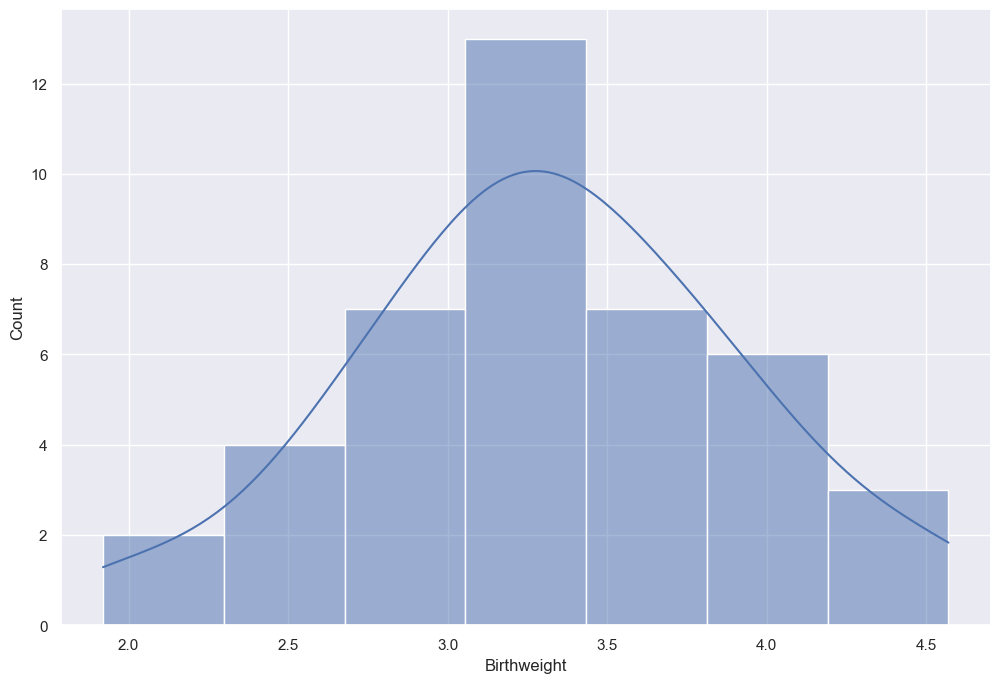

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(birth_weigth_data['Birthweight'], kde=True)

((array([-2.13530463, -1.75401012, -1.52749667, -1.35994814, -1.2237273 ,
         -1.10706946, -1.00380487, -0.91026749, -0.8240868 , -0.74363219,
         -0.66772711, -0.5954891 , -0.52623439, -0.45941783, -0.39459348,
         -0.33138763, -0.2694798 , -0.20858878, -0.14846216, -0.08886798,
         -0.02958803,  0.02958803,  0.08886798,  0.14846216,  0.20858878,
          0.2694798 ,  0.33138763,  0.39459348,  0.45941783,  0.52623439,
          0.5954891 ,  0.66772711,  0.74363219,  0.8240868 ,  0.91026749,
          1.00380487,  1.10706946,  1.2237273 ,  1.35994814,  1.52749667,
          1.75401012,  2.13530463]),
  array([1.92, 2.05, 2.37, 2.51, 2.65, 2.66, 2.74, 2.75, 2.78, 2.9 , 2.92,
         3.  , 3.03, 3.11, 3.14, 3.15, 3.18, 3.19, 3.2 , 3.23, 3.27, 3.32,
         3.32, 3.35, 3.41, 3.42, 3.53, 3.55, 3.59, 3.63, 3.64, 3.65, 3.77,
         3.86, 3.87, 3.93, 3.94, 4.07, 4.1 , 4.32, 4.55, 4.57])),
 (0.6194639325106983, 3.3128571428571427, 0.9955922379790386))

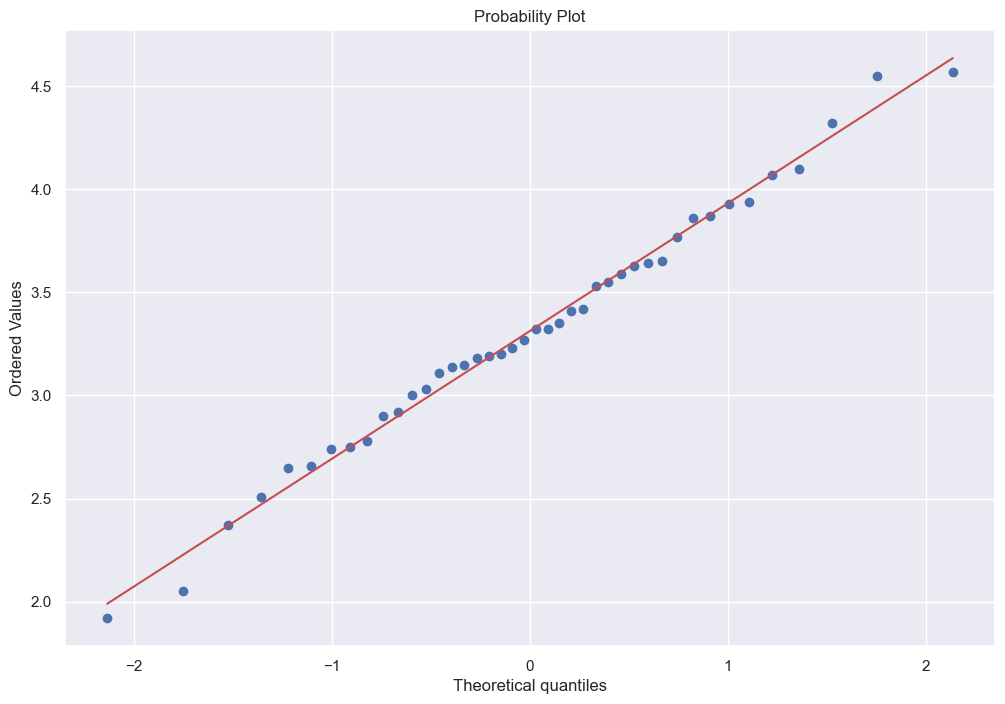

In [9]:
plt.figure(figsize=(12,8))
stats.probplot(birth_weigth_data['Birthweight'], dist='norm', plot=plt)

probplot shows that the birth weight data follows a theoretical normal distribution closely.  

The same can be verified by applying the **shapiro** statistical test.

The **shapiro** statistical test has the following hypothesis: 

H0: the data in **is not** normally distributed  
H1: the data **is** normally distributed  

the default confidence threshold is 5% thus any p-value larger than 0.05 leads to the conclusion that H0 is to be rejected while H1 holds true.  

In [10]:
stats.shapiro(birth_weigth_data['Birthweight'])

ShapiroResult(statistic=0.9899008274078369, pvalue=0.9684653878211975)

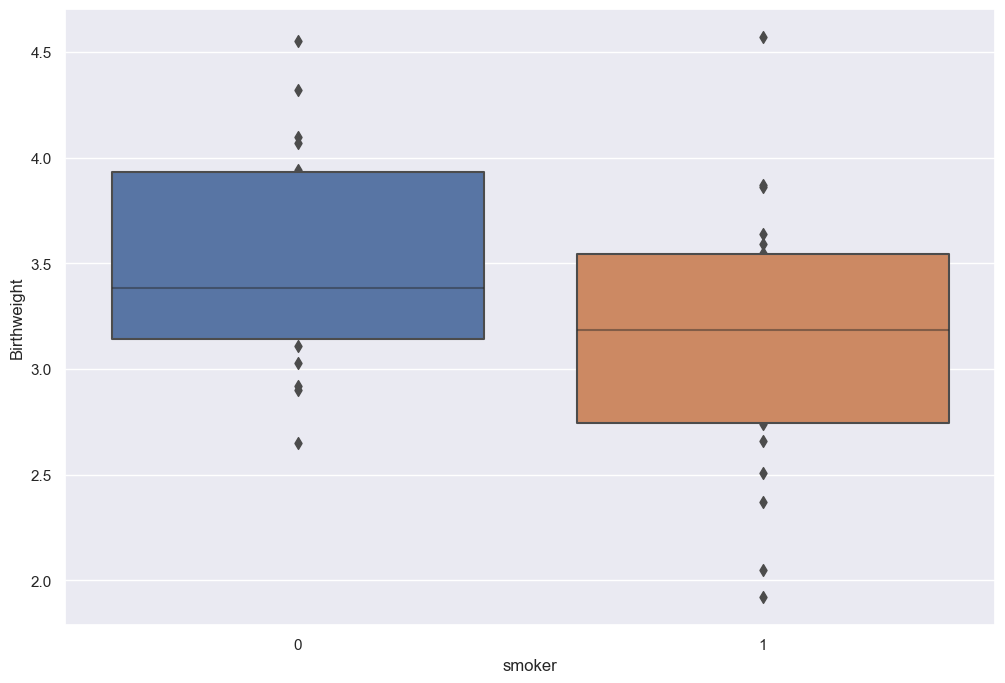

In [11]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=birth_weigth_data, x='smoker', y='Birthweight')
plt.show()

it is clear that we must establish whether the difference between the average of birth weight between the two categories is statistically significant by performing a t-test:

1. smokers
2. non smokers

In [12]:
sample_01 = birth_weigth_data[(birth_weigth_data['smoker'] == 0)]
sample_02 = birth_weigth_data[(birth_weigth_data['smoker'] == 1)]

In [13]:
sample_01.shape, sample_02.shape

((20, 16), (22, 16))

The t-test can be applied only to samples with the same number of records.

In [14]:
sample_02 = sample_02.sample(20)
sample_01.shape, sample_02.shape

((20, 16), (20, 16))

the t-test assumes equality or homogeneity of variances between the two samples. The **Levene** statistical test can be used to test for the assumption of equal variances.  

The **Lavene** test has the following hypotheses:   
- **H0**: the variances of the two samples are equal
- **H1**: the variances of the two samples are **not** equal

In [15]:
stats.levene(sample_01['Birthweight'],sample_02['Birthweight'])

LeveneResult(statistic=0.5627828432752201, pvalue=0.45776116058771166)

The pvalue=0.57 (57%) is well over the default threshold of 5%, therefore this instance of the Lavene test confirms the null hypothesis. This means that it is unlikely that the two samples display very similar variances by chance.

The Lavene test confirms that the variances of the birthweight samples sample_01 and sample_03 are equal, which is a precondition to applying the t-test to test whether the means of these samples may be  considered statistically different.


In [16]:
stats.ttest_ind(sample_01['Birthweight'],sample_02['Birthweight'])

TtestResult(statistic=2.171560081881696, pvalue=0.03619911258435425, df=38.0)

The t-test null hypotheses are the following.

H0: the two independent samples have identical average values
H1: the two independent samples have statistically different average values

A t-test p-value > 0.05 (5%) rejects H1 (the alternative hypothesis)
A t-test p-value < 0.05 (5%) rejects H0 (the null hypothesis).

In this example the p-value that is obtained by running the test changes with each run and it is above and below the threshold of 5%, therefore it does not provide a good tool to test whether the average Birthweight in the sample data sample_01 and sample_03 are statistically different or not.